Coursera Google Advanced Data Analytics

Course 5 Regression Analysis Simplify Complex Data Relationships

Module 4 Advanced hypothesis testing

Explore one-way vs. two-way ANOVA tests with Python

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
diamonds = sns.load_dataset("diamonds")

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='color', ylabel='price'>

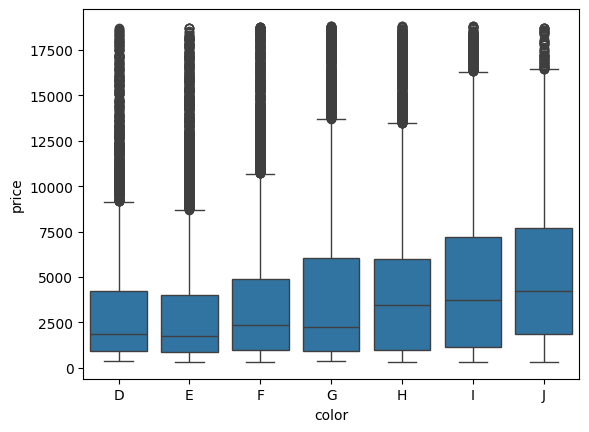

In [5]:
sns.boxplot(x = "color", y = "price", data = diamonds)

In [6]:
# Fit OLS model
model = ols(formula = "price ~ C(color)", data = diamonds).fit()

In [7]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     290.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:25:55   Log-Likelihood:            -5.2292e+05
No. Observations:               53940   AIC:                         1.046e+06
Df Residuals:                   53933   BIC:                         1.046e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3169.9541     47.707     66.446      0.000    3076.448    3263.460
C(color)[T.E]   -93.2016     62.047     -1.502      0.133    -214.815      28.411
C(color)[T.F]   554.9323     62.385      8.895      0.000     432.657     677.208
C(color)[T.G]   829.1816     60.345     13.741      0.000     710.905     947.458
C(color)[T.H]  1316.7151     64.287     20.482      0.000    1190.712    1442.718
C(color)[T.I]  1921.9209     71.553     26.860      0.000    1781.676    2062.165
C(color)[T.J]  2153.8639     88.132     24.439      0.000    1981.124    2326.603
==============================================================================
Omnibus:                    14691.760   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33019.415
Skew:                           1.575   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Tow-Way ANOVA Hypothesis

|                               |  Null Hypothesis  |  Aleternative Hypothesis |
| :---:                            |    :---:       |    :---:                              |
| Color                            | There is no difference in<br>diamond price based on color | There is a difference in<br>diamond price based on color |
| Cut                              |  There is no difference in<br>diamond price based on cut | There is a difference in<br>diamond price based on cutThere is  |
| Color & Cut<br>Interaction<br>Effect  | The effect of color on diamond<br> price is independent of the cut, and<br>vice versa | There is an interaction<br>effectbetween color and cut on<br>diamond price |

In [8]:
# Perform ANOVA
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),6.0,2.684911e+10,4.474852e+09,290.205881,0.0
Residual,53933.0,8.316240e+11,1.541958e+07,NaN,NaN


In [13]:
# Fit OLS model
model2 = ols(formula = "price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds).fit()

In [14]:
# Perform ANOVA
sm.stats.anova_lm(model2, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),6.0,2.684911e+10,4.474852e+09,294.069788,0.000000e+00
C(cut),4.0,9.699679e+09,2.424920e+09,159.356253,7.880786e-136
C(color):C(cut),24.0,1.653455e+09,6.889396e+07,4.527442,1.000780e-12
Residual,53905.0,8.202709e+11,1.521697e+07,NaN,NaN


In conclusion,  

*   the price is not the same for different colors
*   the the price is not the same for different diamond cuts
*    there is an interaction effect between the color and cut that impacts the price of the diamond.